### data pre-processing

In [1]:
# Python code to build Machine Learning model for hurricane intensity forecast  
import pandas as pd # For data manipulation and analysis
pd.set_option('display.max_columns', 500)
import numpy as np # For scientific computing

#!pip3 install sklearn # Install machine learning library
import sklearn # For machine learning library
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
#from sklearn.ensemble import ExtraTreesClassifier    # Extra tree classifier
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import brier_score_loss  # Compute the Brier score

import matplotlib.pyplot as plt  #plotting library

##### Eco Loss data

In [2]:
fname='C:\\Users\\HP\\Desktop\\Hurricane\\damage.csv'

# Read EcoLoss data
Ecoloss = pd.read_csv(fname)
Ecoloss.head()

,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH)
0,Gustav,"Sep 10,2002",247,0.0,100000.0,NC,TS,65
1,Florence,"Sep 09,1988",244,2000000.0,2920000.0,LA,1,80
2,Dean,"Jul 30,1995",245,2000000.0,500000.0,TX,TS,45
3,Chris,"Sep 11,1982",242,3000000.0,2000000.0,LA,TS,65
4,Bonnie,"Jun 26,1986",239,7000000.0,2000000.0,TX,1,85


In [9]:
# Extract month from landfall date
Ecoloss['MONTH'] = Ecoloss['landfall date'].apply(lambda x: str(x)[0:3])

# Extract date from landfall date
Ecoloss['DATE'] = Ecoloss['landfall date'].apply(lambda x: str(x)[4:6])

# Extract year from landfall date
Ecoloss['YEAR'] = Ecoloss['landfall date'].apply(lambda x: str(x)[7:11])

Ecoloss.head()

,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH),MONTH,DATE,YEAR
0,Gustav,"Sep 10,2002",247,0.0,100000.0,NC,TS,65,Sep,10,2002
1,Florence,"Sep 09,1988",244,2000000.0,2920000.0,LA,1,80,Sep,09,1988
2,Dean,"Jul 30,1995",245,2000000.0,500000.0,TX,TS,45,Jul,30,1995
3,Chris,"Sep 11,1982",242,3000000.0,2000000.0,LA,TS,65,Sep,11,1982
4,Bonnie,"Jun 26,1986",239,7000000.0,2000000.0,TX,1,85,Jun,26,1986


In [21]:
Month2Int={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
Ecoloss['MONTHINT']=Ecoloss['MONTH'].apply(lambda x: Month2Int[x])
Ecoloss.head()

,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH),MONTH,DATE,YEAR,MONTHINT
0,Gustav,"Sep 10,2002",247,0.0,100000.0,NC,TS,65,Sep,10,2002,09
5,Alex,"Aug 03,2004",238,7000000.0,4000000.0,NC,1,80,Aug,03,2004,08
6,Arthur,"Jul 04,2014",237,7000000.0,6000000.0,NC,2,100,Jul,04,2014,07
7,Fay,"Sep 07,2002",236,8000000.0,4500000.0,TX,TS,60,Sep,07,2002,09
8,Kyle,"Oct 11,2002",234,11000000.0,5000000.0,SC,TS,40,Oct,11,2002,10


In [17]:
Ecoloss=Ecoloss[(Ecoloss['YEAR']>='1998') & (Ecoloss['YEAR']<='2017')]
Ecoloss.head()

,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH),MONTH,DATE,YEAR
0,Gustav,"Sep 10,2002",247,0.0,100000.0,NC,TS,65,Sep,10,2002
5,Alex,"Aug 03,2004",238,7000000.0,4000000.0,NC,1,80,Aug,03,2004
6,Arthur,"Jul 04,2014",237,7000000.0,6000000.0,NC,2,100,Jul,04,2014
7,Fay,"Sep 07,2002",236,8000000.0,4500000.0,TX,TS,60,Sep,07,2002
8,Kyle,"Oct 11,2002",234,11000000.0,5000000.0,SC,TS,40,Oct,11,2002


In [18]:
Ecoloss.YEAR.value_counts().sort_index()

1998    7
1999    5
2000    2
2001    3
2002    6
2003    3
2004    7
2005    6
2006    1
2007    1
2008    5
2010    4
2011    1
2012    2
2014    1
2016    2
2017    3
Name: YEAR, dtype: int64

In [53]:
Ecoloss=Ecoloss.reset_index(drop=True)

In [56]:
# set a 'key' to match ships dataset
# upper Name[0:4]+Year+Month(int)
Ecoloss['KEY']=0
for i in range(0,Ecoloss.shape[0]):
    Ecoloss.loc[i,'KEY']='-'.join([Ecoloss.loc[i,'storm name'][0:4].upper(),Ecoloss.loc[i,'YEAR'],Ecoloss.loc[i,'MONTHINT']])
Ecoloss.head()

,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH),MONTH,DATE,YEAR,MONTHINT,KEY
0,Gustav,"Sep 10,2002",247,0.0,100000.0,NC,TS,65,Sep,10,2002,09,GUST-2002-09
1,Alex,"Aug 03,2004",238,7000000.0,4000000.0,NC,1,80,Aug,03,2004,08,ALEX-2004-08
2,Arthur,"Jul 04,2014",237,7000000.0,6000000.0,NC,2,100,Jul,04,2014,07,ARTH-2014-07
3,Fay,"Sep 07,2002",236,8000000.0,4500000.0,TX,TS,60,Sep,07,2002,09,FAY-2002-09
4,Kyle,"Oct 11,2002",234,11000000.0,5000000.0,SC,TS,40,Oct,11,2002,10,KYLE-2002-10


In [73]:
Ecoloss.shape[0]

59

##### Ships data

In [10]:
#====================================
#Read SHIPS spread-sheet data
#====================================
# Set up the location of the SHIPS data
fname='C:\\Users\\HP\\Desktop\\Hurricane\\Dataset_SHIPS_RII_ATL.csv'
#fname='Dataset_SHIPS_RII_EPAC.csv'

# Read SHIPS data
ships = pd.read_csv(fname)
ships.head()

,NAME,DATE,HOUR,VMX0,LAT,LON,MSLP,ID,DELV12,DELV24,DELV36,DELV48,PER,SHRD,D200,RHLO,PX30,SDBT,POT,OHC,TPW,PC2,U200,TPWC,AVBT,RSST
0,ALEX,980727,12,25,11.3,-25.4,1009,AL011998,0,5,10,10,9999,6.3,103,68,72,13.8,-101,12,0,-58,-7.9,55.7,-473,27.4
1,ALEX,980727,18,25,11.7,-27.2,1009,AL011998,0,5,10,10,9999,11.2,118,69,55,12.6,-102,17,0,-10,-6.4,55.7,-360,27.4
2,ALEX,980728,0,25,12.2,-29.2,1009,AL011998,5,10,10,10,0,8.6,116,71,70,12.8,-105,21,0,-3,-8.8,56.9,-381,27.4
3,ALEX,980728,6,25,12.6,-31.3,1008,AL011998,5,10,10,15,0,12.2,91,71,57,12.2,-100,29,0,-44,-6.0,52.7,-481,27.2
4,ALEX,980728,12,30,12.9,-33.3,1007,AL011998,5,5,5,10,5,10.5,88,71,83,10.1,-89,15,190,-46,-6.5,55.3,-516,27.1


In [11]:
#================================
# Set up parameters
#================================
# Year range for training and validating
year_train=['1998','2008']

# Year range for forecast
year_fcst=['2009','2017']

# Variable names for predictors
#PredictorName=['PER','SHRD','D200','TPW','PC2','SDBT','POT','OHC','VMX0']

# Variable name for predictand
TargetName='DELV24'

# Threshold of Rapid Intensification 
RIValue=30

# Climatology of RI (30 kt) frequency at Atlantic basin (Kaplan et al. 2015)
clim=0.125   #ATL 30 kt
#clim=0.084   #EPAC 30 kt

In [12]:
#================================
# Data pre-processing
#================================
# Set all 9999s as NaNs
ships = ships.replace(9999,np.NaN)

# drop NaNs
ships=ships.dropna()

# Pad the date columns with 00 for the year 2000
ships['DATE'] = ships['DATE'].apply(lambda x: str(x).zfill(6))

# Extract month from date
ships['MONTH'] = ships['DATE'].apply(lambda x: str(x)[2:4])

# Extract year from date
ships['YEAR'] = ships['DATE'].apply(lambda x: ('19' + str(x)[0:2]) if (str(x)[0:1]!= '0' and str(x)[0:1]!= '1') else ('20' + str(x)[0:2]))
ships.head()

# Set the target column
ships['TAR'] = ships[TargetName].apply(lambda x: 1 if x >= RIValue else 0)
ships.head()

,NAME,DATE,HOUR,VMX0,LAT,LON,MSLP,ID,DELV12,DELV24,DELV36,DELV48,PER,SHRD,D200,RHLO,PX30,SDBT,POT,OHC,TPW,PC2,U200,TPWC,AVBT,RSST,MONTH,YEAR,TAR
2,ALEX,980728,0,25,12.2,-29.2,1009,AL011998,5.0,10.0,10.0,10.0,0.0,8.6,116,71,70.0,12.8,-105,21.0,0,-3.0,-8.8,56.9,-381.0,27.4,07,1998,0
3,ALEX,980728,6,25,12.6,-31.3,1008,AL011998,5.0,10.0,10.0,15.0,0.0,12.2,91,71,57.0,12.2,-100,29.0,0,-44.0,-6.0,52.7,-481.0,27.2,07,1998,0
4,ALEX,980728,12,30,12.9,-33.3,1007,AL011998,5.0,5.0,5.0,10.0,5.0,10.5,88,71,83.0,10.1,-89,15.0,190,-46.0,-6.5,55.3,-516.0,27.1,07,1998,0
5,ALEX,980728,18,30,13.1,-35.1,1006,AL011998,5.0,5.0,10.0,15.0,5.0,9.7,44,72,35.0,15.9,-86,22.0,15,36.0,-7.2,56.6,-270.0,27.1,07,1998,0
6,ALEX,980729,0,35,13.3,-36.8,1005,AL011998,0.0,0.0,5.0,10.0,5.0,9.9,37,74,56.0,14.5,-80,24.0,0,-6.0,-10.3,57.7,-443.0,27.1,07,1998,0


In [57]:
ships=ships.reset_index(drop=True)
# set a 'key' to match ships dataset
# upper Name[0:4]+Year+Month(int)
ships['KEY']=0
for i in range(0,ships.shape[0]):
    ships.loc[i,'KEY']='-'.join([ships.loc[i,'NAME'],ships.loc[i,'YEAR'],ships.loc[i,'MONTH']])
ships.head()

,NAME,DATE,HOUR,VMX0,LAT,LON,MSLP,ID,DELV12,DELV24,DELV36,DELV48,PER,SHRD,D200,RHLO,PX30,SDBT,POT,OHC,TPW,PC2,U200,TPWC,AVBT,RSST,MONTH,YEAR,TAR,KEY
0,ALEX,980728,0,25,12.2,-29.2,1009,AL011998,5.0,10.0,10.0,10.0,0.0,8.6,116,71,70.0,12.8,-105,21.0,0,-3.0,-8.8,56.9,-381.0,27.4,07,1998,0,ALEX-1998-07
1,ALEX,980728,6,25,12.6,-31.3,1008,AL011998,5.0,10.0,10.0,15.0,0.0,12.2,91,71,57.0,12.2,-100,29.0,0,-44.0,-6.0,52.7,-481.0,27.2,07,1998,0,ALEX-1998-07
2,ALEX,980728,12,30,12.9,-33.3,1007,AL011998,5.0,5.0,5.0,10.0,5.0,10.5,88,71,83.0,10.1,-89,15.0,190,-46.0,-6.5,55.3,-516.0,27.1,07,1998,0,ALEX-1998-07
3,ALEX,980728,18,30,13.1,-35.1,1006,AL011998,5.0,5.0,10.0,15.0,5.0,9.7,44,72,35.0,15.9,-86,22.0,15,36.0,-7.2,56.6,-270.0,27.1,07,1998,0,ALEX-1998-07
4,ALEX,980729,0,35,13.3,-36.8,1005,AL011998,0.0,0.0,5.0,10.0,5.0,9.9,37,74,56.0,14.5,-80,24.0,0,-6.0,-10.3,57.7,-443.0,27.1,07,1998,0,ALEX-1998-07


In [59]:
# combine two tables
Merge = pd.merge(ships, Ecoloss, on=['KEY'])
Merge

,NAME,DATE_x,HOUR,VMX0,LAT,LON,MSLP,ID,DELV12,DELV24,DELV36,DELV48,PER,SHRD,D200,RHLO,PX30,SDBT,POT,OHC,TPW,PC2,U200,TPWC,AVBT,RSST,MONTH_x,YEAR_x,TAR,KEY,storm name,landfall date,damage ranke,current damage($ 2020),base damage,landfall state,category,winds(MPH),MONTH_y,DATE_y,YEAR_y,MONTHINT
0,BONN,980820,0,30,16.2,-52.2,1009,AL021998,5.0,10.0,20.0,35.0,5.0,10.8,105,73,32.0,23.7,-108,70.0,0,34.0,-27.3,60.0,-246.0,28.6,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
1,BONN,980820,6,30,16.9,-54.7,1008,AL021998,5.0,15.0,25.0,40.0,0.0,1.2,83,73,61.0,25.7,-112,73.0,166,-34.0,-24.7,62.3,-420.0,28.8,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
2,BONN,980820,12,35,17.3,-57.3,1007,AL021998,5.0,15.0,30.0,40.0,5.0,7.9,47,72,61.0,23.2,-110,82.0,0,-4.0,-24.9,62.2,-300.0,28.9,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
3,BONN,980820,18,35,18.2,-59.6,1006,AL021998,10.0,20.0,35.0,50.0,5.0,14.1,60,71,66.0,18.1,-108,78.0,60,-47.0,-24.1,60.9,-411.0,29.0,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
4,BONN,980821,0,40,18.7,-61.3,1005,AL021998,10.0,25.0,35.0,50.0,5.0,10.2,60,69,67.0,16.1,-97,94.0,44,-43.0,-25.2,62.0,-433.0,29.0,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
5,BONN,980821,6,45,19.1,-62.9,1002,AL021998,10.0,25.0,40.0,50.0,10.0,10.3,23,67,45.0,25.9,-92,100.0,15,-3.0,-23.1,63.1,-342.0,29.0,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
6,BONN,980821,12,50,19.5,-64.5,1000,AL021998,15.0,25.0,40.0,50.0,10.0,7.4,42,68,44.0,25.2,-89,87.0,0,5.0,-20.5,62.9,-360.0,29.1,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
7,BONN,980821,18,55,20.3,-65.9,999,AL021998,15.0,30.0,40.0,45.0,10.0,9.1,55,69,71.0,19.5,-78,90.0,0,-81.0,-19.5,66.5,-566.0,29.1,08,1998,1,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
8,BONN,980822,0,65,21.1,-67.3,991,AL021998,10.0,25.0,35.0,35.0,15.0,1.5,31,67,84.0,12.9,-77,67.0,0,-143.0,-13.0,66.1,-644.0,29.5,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08
9,BONN,980822,6,70,21.8,-68.7,989,AL021998,15.0,25.0,30.0,30.0,15.0,7.9,9,67,98.0,8.0,-70,96.0,0,-145.0,-4.5,69.0,-653.0,29.4,08,1998,0,BONN-1998-08,Bonnie,"Aug 26,1998",92,2.410000e+09,7.200000e+08,NC,2,110,Aug,26,1998,08


### Forecasting Model

In [62]:
# Variable names for predictors
PredictorName=['PER','SHRD','D200','TPW','PC2','SDBT','POT','OHC','VMX0']

# Data within training and validating years
data_train = Merge[(Merge['YEAR_x']>=year_train[0]) & (Merge['YEAR_x']<=year_train[1])]

# All predictors for training and validating
XData = data_train[PredictorName]

# All predictand for training and validating
YData = data_train['current damage($ 2020)']

##### Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(XData, YData)
score=cross_val_score(regressor, XData, YData, cv=10)
# score is R^2
score

array([-3.93473645e+02, -1.71815733e+01, -2.67439561e+00, -2.49668349e+03,
       -9.47739271e+00, -3.31586023e-01, -6.92510874e-01, -6.48889917e-02,
       -1.77069974e+00, -8.54611979e-01])

In [79]:
# Data within forecast years
data_fcst = Merge[(Merge['YEAR_x']>=year_fcst[0]) & (Merge['YEAR_x']<=year_fcst[1])]
#data_fcst
# All predictors for forecast
XData_fcst = data_fcst[PredictorName]
#XData_fcst
# All truth of predictand for forecast
YData_fcst = data_fcst['current damage($ 2020)']
#YData_fcst
# Predict class for x
RFR_y_pred_fcst = regressor.predict(XData_fcst)
#y_pred_fcst

In [81]:
from sklearn import metrics
MSE = metrics.mean_squared_error(YData_fcst, RFR_y_pred_fcst)
RMSE = np.sqrt(metrics.mean_squared_error(YData_fcst, RFR_y_pred_fcst))
print('MSE:',MSE,'RMSE:',RMSE)

MSE: 1.6123937493489135e+21 RMSE: 40154623013.407974


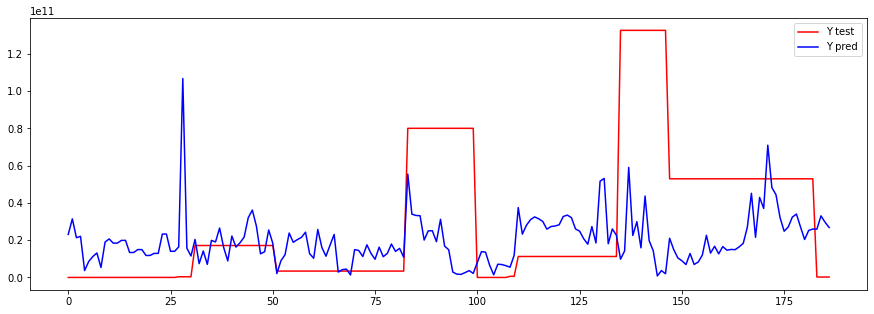

In [80]:
plt.figure(figsize=(15,5))
plt.plot(range(len(YData_fcst)), YData_fcst, 'r', label='Y test')
plt.plot(range(len(YData_fcst)), RFR_y_pred_fcst, 'b', label='Y pred')
plt.legend()

##### Linear Model

In [67]:
from sklearn.linear_model import LinearRegression  #线性回归
linreg = LinearRegression()
linreg.fit(XData, YData)

LinearRegression()

In [68]:
# Data within forecast years
data_fcst = Merge[(Merge['YEAR_x']>=year_fcst[0]) & (Merge['YEAR_x']<=year_fcst[1])]
#data_fcst

In [69]:
# All predictors for forecast
XData_fcst = data_fcst[PredictorName]
#XData_fcst

In [70]:
# All truth of predictand for forecast
YData_fcst = data_fcst['current damage($ 2020)']
#YData_fcst

In [71]:
# Predict class for x
y_pred_fcst = linreg.predict(XData_fcst)
#y_pred_fcst

In [72]:
from sklearn import metrics
MSE = metrics.mean_squared_error(YData_fcst, y_pred_fcst)
RMSE = np.sqrt(metrics.mean_squared_error(YData_fcst, y_pred_fcst))
print('MSE:',MSE,'RMSE:',RMSE)

MSE: 1.7680340706558686e+21 RMSE: 42047997225.26471


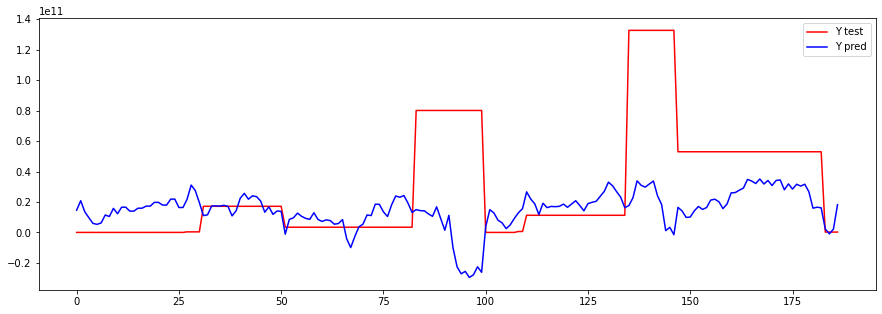

In [75]:
plt.figure(figsize=(15,5))
plt.plot(range(len(YData_fcst)), YData_fcst, 'r', label='Y test')
plt.plot(range(len(YData_fcst)), y_pred_fcst, 'b', label='Y pred')
plt.legend()